# What is a vector? 

A vector is a series of numbers, arranged in either a column or a row. The numbers stored in a vector are called **elements**.

In [1]:
data_point <- 3 #this is one element 
print(data_point)


vector_1 = c(data_point, data_point + 2) #a vector is a series of elements 
vector_2 = c(data_point+4, data_point + 6) #a vector is a series of elements 

print(vector_1) 
print(vector_2)

[1] 3
[1] 3 5
[1] 7 9


A data point: $3$
<br>
A column vector with elements 3 and 5: $\begin{bmatrix}3\\5\end{bmatrix}$
<br>
A row vector with elements 7 and 9: $\begin{bmatrix} 7 & 9\end{bmatrix}$

# What is a matrix? 

A matrix is a rectangular array of vectors with one or more rows or columns. Matrices are described by the number of rows ( ```m```) and the number of columns ( ```n```) they have; a matrix is said to be of **dimension** (```m x n```).

![matrix_intro](imgs/matrix_intro.png)


For example, we can form a 2x2 matrix from the two vectors we used above: $\begin{bmatrix} 3,5 \\ 7,9\end{bmatrix}$

You can create a matrix in R by calling the function `matrix` and supplying it with data, the number of rows and/or columns you would like, and a method for filling the matrix (by row or by column). 

In [2]:
data <- seq(1:10) 
nrow = 2
ncol = 5


sample_matrix_by_col <- matrix(data, nrow, ncol, byrow = 0) #fill matrix by column, not by rows
sample_matrix_by_row <- matrix(data, nrow, ncol, byrow = 1)

#note the difference in the structure of the matrix when it's filled by row vs. by column 
head(sample_matrix_by_col)
head(sample_matrix_by_row)

1,3,5,7,9
2,4,6,8,10


1,2,3,4,5
6,7,8,9,10


__Note__ that only one dimension (```nrow``` or ```ncol```) is needed when specifiying a matrix in R. 
R *can* infer ```nrow``` if ```ncol``` is specified, for example. 
However, to avoid errors, it's best to be explicit to the extent that it makes your code easier to read and error-check.

# Basic kinds of matrices 

### Square 
A square matrix is a matrix that has an equal number of rows and columns (`m = n`). So a matrix with 4 columns and 4 rows is square, a matrix with 10 rows and 10 columns is square, and so on.

In [3]:
square_matrix_4 <- matrix(1:16, nrow = 4)
square_matrix_4

square_matrix_10 <- matrix(1:100, nrow=10)
square_matrix_10

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


1,11,21,31,41,51,61,71,81,91
2,12,22,32,42,52,62,72,82,92
3,13,23,33,43,53,63,73,83,93
4,14,24,34,44,54,64,74,84,94
5,15,25,35,45,55,65,75,85,95
6,16,26,36,46,56,66,76,86,96
7,17,27,37,47,57,67,77,87,97
8,18,28,38,48,58,68,78,88,98
9,19,29,39,49,59,69,79,89,99
10,20,30,40,50,60,70,80,90,100


### Symmetric 
A square matrix is symmetric if the elements are reflected about the diagonal line of numbers. You can imagine that if you folded a square matrix in half along the diagonal, the reflected elements would touch. 


<img src="imgs/symmetric_matrix.png" alt="drawing" width="300"/>


*You can also think of a symmetric matrix as a matrix equal to its transposed form: $A = A^T$*

In [4]:
symmetric_matrix <- matrix(1:16,nrow = 4)
symmetric_matrix[lower.tri(symmetric_matrix)] <- t(symmetric_matrix)[lower.tri(symmetric_matrix)] # replace lower triangular portion with lower triangular portion of transpose 

symmetric_matrix #an example of a symmetric matrix

t(symmetric_matrix) == symmetric_matrix #a transposed symmetric matrix is equal to the original matrix 

1,5,9,13
5,6,10,14
9,10,11,15
13,14,15,16


TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE
TRUE,TRUE,TRUE,TRUE


### Identity 
An identity matrix is a special case of a square, symmetric matrix. Specifically, it has ones on the diagonal line and zeros everywhere else. 


<img src="imgs/identity_matrix.png" alt="drawing" width="300"/>

Why is this important?
As you'll see later, the identity matrix acts like the number 1 in the real number system, but for matrix operations. 

In [5]:
mat <- matrix(0, 5, 5)
diag(mat) <- 1
mat

1,0,0,0,0
0,1,0,0,0
0,0,1,0,0
0,0,0,1,0
0,0,0,0,1


### Summary
* A square matrix has an equal number of rows and columns. 
<br>
* A symmetric matrix is a subset of square matrices. 

* The identity matrix is subset of square, symmetric matrices, with useful properties that you'll need later. 

# Matrix manipulation

   ## Basic indexing

You can use bracket notation to access the elements of a matrix. Like above, the bracket notation specifies the row number first, then the column number, like this: 


```matrix[row_index, column_index]```
<br>

__Note__ that R uses one-based indexing. For example, the following command would find the element in the 1st row and the 6th column of a matrix. 

In [8]:
sample_matrix_by_col[1, 5] #this accesses the element in the first row and fifth column of the matrix (note that R uses one-based indexing)

[1] 9

To access all rows of a column, leave the row index blank. <br>
```matrix[ ,column_index]``` 

In [9]:
sample_matrix_by_col[ ,2] #accessing all rows of column 6

[1] 3 4

To access all columns of a row, leave the column index blank. <br>
```matrix[row_index, ]```

In [10]:
sample_matrix_by_col[1, ] #accessing all columns of row 1

[1] 1 3 5 7 9

It's also easy to extract several rows or columns at once. 

In [11]:
sample_matrix_by_col

1,3,5,7,9
2,4,6,8,10


In [12]:
sample_matrix_by_col[,1:3] #getting all rows of columns 1-3

1,3,5
2,4,6


In [13]:
sample_matrix_by_col[1,1:3] #getting columns 1-3 of row 1

[1] 1 3 5

## Basic matrix operations

Now that we know what a matrix is, how to create one in R, and how to access their elements, let's review how to manipulate them. 

In [14]:
mat_1 <- matrix(1:6, nrow = 2)
mat_2 <- matrix(7:12, nrow = 2)

In [15]:
mat_1

1,3,5
2,4,6


In [16]:
mat_2

7,9,11
8,10,12


#### Addition and subtraction
Addition and subtraction is an element-wise operation in the world of matrices. That is, when two matrices are added, each element of the first matrix is added to the corresponding element in the second matrix. Importantly, matrices may only be added or subtracted when they are of the same **dimension**. 

__Note__: R will let you perform matrix addition and subtraction when two matrices are NOT of the same dimension, so watch out for this. 

In [17]:
#addition 
mat_1 + mat_2 #each element is added to the next in-place 

8,12,16
10,14,18


In [18]:
mat_2

7,9,11
8,10,12


If you add a constant to a matrix, then that constant is added to all elements, and the rules are the same for subtraction.

In [19]:
mat_1 + 3 # each element increases by 3

4,6,8
5,7,9


In [20]:
#subtraction
mat_2 - mat_1 #each element is subtracted from the next in-place 

6,6,6
6,6,6


In [21]:
mat_2 - 3

4,6,8
5,7,9


#### Transposition

When a matrix is transposed, the columns become the rows. A transposed matrix is denoted **A'**. 

As an example, look at the original matrix, ```mat_2```:

In [22]:
mat_2

7,9,11
8,10,12


The transposition switches rows and columns: 

In [23]:
#transposition 
transposed_mat_2 <- t(mat_2) 
transposed_mat_2

7,8
9,10
11,12


And if we tranpose the transposed matrix, we return it to its original form: 

In [24]:
t(transposed_mat_2)

7,9,11
8,10,12


#### Multiplication

Multiplying a matrix by a constant multiplies each element of a matrix by that number. 

In [25]:
mat_1 * 3

3,9,15
6,12,18


In [26]:
#element-wise multiplication
mat_1*mat_2

7,27,55
16,40,72


**Matrix multiplication**. Order matters in matrix multiplication. 
The number of columns for the first matrix must equal the number of rows for the second matrix. 
Matrices that meet these requirements "conform" to multiplication. 

$\begin{bmatrix} a,b \\ c,d\end{bmatrix} * \begin{bmatrix} e, f\\ g, h\end{bmatrix} = \begin{bmatrix} ae + bg,af+bh \\ ce + dg,cf + dh\end{bmatrix}$

In [27]:
#matrix multiplication 
mat_1 %*% t(mat_2)

89,98
116,128


####  Division

Matrices can be divided element-wise.<br>

In [28]:
#division 
mat_1 / mat_2

0.1428571,0.3333333,0.4545455
0.2500000,0.4000000,0.5000000


And you can divide a matrix by a constant (element-wise). 

In [29]:
mat_1 / 2

0.5,1.5,2.5
1.0,2.0,3.0


#### Inversion

The inverse of a matrix can be thought of as the matrix version of taking the reciprocal of a real number. The inverse of the matrix A is denoted $\bf{A^{-1}}$. Usually, inversion can only be performed on square matrices. The formula for the inverse of a 2x2 matrix is:  


$$\begin{bmatrix} a&b \\ c&d\end{bmatrix}^{-1}  = \frac{1}{(ad-bc)} *  \begin{bmatrix} d&-b \\ -c&a\end{bmatrix}$$


The method of calculating inverses for larger matrices is more complicated and is usually included in most software. 

In [30]:
#taking the inverse 
solve(mat_2[, 2:3]) 

-6,5.5
5,-4.5


# Use matrix manipulation to solve a linear regression problem "by hand"

First, a *brief* introduction to linear regression. 

Linear regression usually takes the basic form of 

$y = \beta X + \epsilon$

where $y$ is a vector of the response variable, $X$ is a vector of predictors, $\beta$ is a vector of parameters that we want to estimate (the slope and intercept), and $\epsilon$ is the error term. The error term represents irreducible error, or the variance in $y$ unassociated with our predictor. 

To make this problem concrete, let's consider the ```mtcars``` data set. This data comes from the 1974 Motor Trend US magazine, and tells us about the fuel consumption and design/performance of a sample of cars from that era.

In [31]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


For this problem, let's consider the relationship between the weight of a car and the number of miles it gets per gallon, or 

$m = \beta \textit{w} + \epsilon$

where $m$ = miles per gallon and $w$ = the weight of the car.

Here's a plot of the general relationship between the two variables:

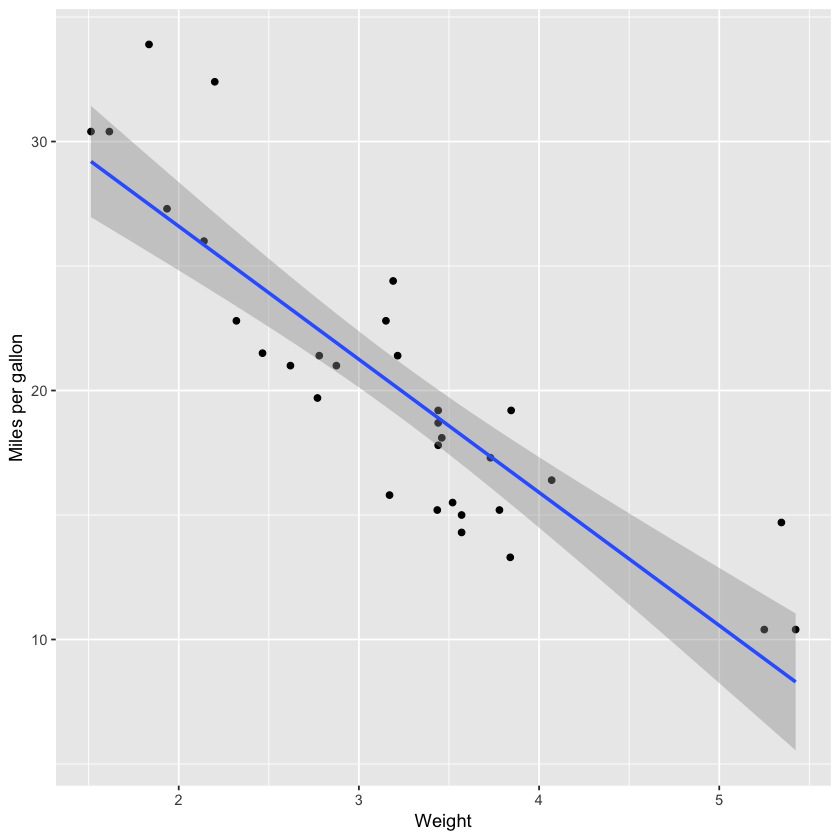

In [52]:
#ask them to plot the data using ggplot 
library(tidyverse)
ggplot(mtcars, aes(wt,mpg)) + geom_point() + xlab('Weight') + ylab('Miles per gallon') + geom_smooth(method = 'lm', level=0.95)

Here is the equation to solve a simple linear regression problem in matrix form: 

$$\beta=(X'X)^{-1}X'y $$

Now, given your new (or refreshed) knowledge of matrix notation and manipulation, use matrix computations to implement linear regression using the equation above (not by using a linear regression function like `lm`). 

The derivation of these equations will be introduced in the lecture section soon. The purpose of this exercise is just to become familiar enough with matrix notation to implement this equation. 

You can check your results using ``` lm(mpg~wt)```.

In [45]:
#to get you started

X <- matrix(mtcars$wt, ncol = 1) #load data as matrix
y <- matrix(mtcars$mpg, ncol = 1)

intercept <- rep(1, nrow(y))

X <- cbind(intercept, X) #add a column for the intercept to X

In [46]:
lm(mtcars$mpg~mtcars$wt, data = mtcars)


Call:
lm(formula = mtcars$mpg ~ mtcars$wt, data = mtcars)

Coefficients:
(Intercept)    mtcars$wt  
     37.285       -5.344  


For more on matrices, look [here](https://www.statisticshowto.datasciencecentral.com/matrices-and-matrix-algebra/). 

*Notebook by Krista Bond. <br>
Images courtesy of Wikipedia.*